In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
train_data[:2]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])],
      dtype=object)

In [3]:
train_labels  # 多分類

array([ 3,  4,  3, ..., 25,  3, 25])

In [4]:
word_index = reuters.get_word_index()

In [5]:
dict(list(word_index.items())[:5])

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796}

In [6]:
reverse_word_index = dict([(v, k) for k, v in word_index.items()])

In [7]:
decode_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decode_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
list(reverse_word_index.get(i) for i in range(3))

[None, 'the', 'of']

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# 驗證集
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 227us/step - loss: 2.8712 - accuracy: 0.5227 - val_loss: 1.8641 - val_accuracy: 0.6370
Epoch 2/20
7982/7982 [==============================] - 1s 149us/step - loss: 1.5109 - accuracy: 0.7022 - val_loss: 1.3592 - val_accuracy: 0.7020
Epoch 3/20
7982/7982 [==============================] - 1s 99us/step - loss: 1.0973 - accuracy: 0.7702 - val_loss: 1.1551 - val_accuracy: 0.7520
Epoch 4/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.8527 - accuracy: 0.8203 - val_loss: 1.0467 - val_accuracy: 0.7790
Epoch 5/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.6756 - accuracy: 0.8607 - val_loss: 0.9818 - val_accuracy: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 113us/step - loss: 0.5383 - accuracy: 0.8893 - val_loss: 0.9170 - val_accuracy: 0.8000
Epoch 7/20
7982/7982 [==============================] - 1s 122us/step - loss:

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


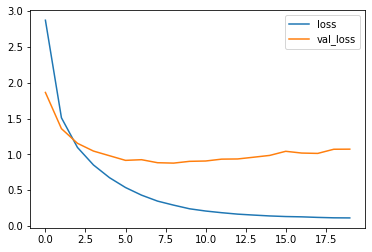

In [15]:
import matplotlib.pyplot as plt

print(history.history.keys())
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()


In [16]:
model = models.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax')) 
model.compile(optimizer='rmsprop',               
              loss='categorical_crossentropy',               
              metrics=['accuracy']) 
model.fit(partial_x_train,           
          partial_y_train,           
          epochs=9,           
          batch_size=512,           
          validation_data=(x_val, y_val)) 
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 128us/step - loss: 2.5848 - accuracy: 0.5014 - val_loss: 1.6831 - val_accuracy: 0.6530
Epoch 2/9
7982/7982 [==============================] - 1s 119us/step - loss: 1.3987 - accuracy: 0.7103 - val_loss: 1.3192 - val_accuracy: 0.7200
Epoch 3/9
7982/7982 [==============================] - 1s 122us/step - loss: 1.0427 - accuracy: 0.7820 - val_loss: 1.1581 - val_accuracy: 0.7520
Epoch 4/9
7982/7982 [==============================] - 1s 113us/step - loss: 0.8189 - accuracy: 0.8259 - val_loss: 1.0509 - val_accuracy: 0.7760
Epoch 5/9
7982/7982 [==============================] - 1s 95us/step - loss: 0.6531 - accuracy: 0.8609 - val_loss: 0.9900 - val_accuracy: 0.7870
Epoch 6/9
7982/7982 [==============================] - 1s 99us/step - loss: 0.5198 - accuracy: 0.8924 - val_loss: 0.9468 - val_accuracy: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s 126us/step - loss: 0.4177 

In [17]:
results = model.evaluate(x_test, one_hot_test_labels)

results

2246/2246 [==============================] - 0s 79us/step


[1.0126701076436233, 0.777827262878418]

In [18]:
predictions = model.predict(x_test)

In [19]:
predictions[0]

array([4.43795699e-07, 3.18270941e-05, 2.56668809e-05, 8.27633679e-01,
       1.65278926e-01, 1.33949914e-06, 8.72544024e-06, 6.91174546e-06,
       1.24205195e-03, 5.71908640e-06, 6.58189356e-06, 2.24405434e-04,
       8.75979531e-05, 2.94086785e-05, 3.25179972e-05, 1.02097886e-06,
       1.02881389e-03, 4.22301237e-05, 6.27553891e-05, 2.33049621e-04,
       3.18080536e-03, 1.00957986e-04, 1.11198653e-06, 2.61057576e-05,
       2.53080707e-05, 1.35358823e-05, 1.84355213e-05, 4.73123691e-05,
       1.17346295e-04, 7.17931325e-05, 3.69219742e-05, 6.58244608e-06,
       5.49348370e-05, 4.66689198e-06, 9.68290333e-05, 1.66565515e-05,
       7.16004797e-06, 7.15249280e-06, 9.02486420e-07, 1.23121266e-04,
       2.54015845e-06, 4.14968599e-05, 2.48126366e-06, 1.02980084e-05,
       5.26240967e-07, 1.26333782e-06], dtype=float32)

In [20]:
np.argmax(predictions[0])

3